In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import tensorflow as tf 
from tensorflow import keras

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Importing

In [87]:

data = pd.read_csv('Bike_Buyer_Data_edited.txt')
print(data.values.shape)
data.iloc[0:20,:]

(1000, 14)


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Unnamed: 13
0,22400,Married,Male,10000,0,Partial College,Manual,No,1,0-1 Miles,Pacific,26,Yes,NaN
1,16438,Married,Female,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,30,No,NaN
2,16200,Single,Female,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,35,No,NaN
3,16514,Single,Male,10000,0,Partial College,Manual,Yes,1,1-2 Miles,Pacific,26,Yes,NaN
4,24140,Single,Male,10000,0,Graduate Degree,Manual,No,0,0-1 Miles,Europe,30,Yes,NaN
5,23993,Single,Female,10000,0,Partial College,Manual,No,1,0-1 Miles,Pacific,26,Yes,NaN
6,22402,Married,Male,10000,0,Partial College,Manual,Yes,1,2-5 Miles,Pacific,25,Yes,NaN
7,15465,Married,Female,10000,0,Partial College,Manual,No,1,0-1 Miles,Pacific,25,No,NaN
8,23963,NaN,Married,Male,10000,0,Partial High School,Manual,No,2,0-1 Miles,Europe,33,No
9,17907,Married,Female,10000,0,Partial College,Manual,Yes,1,2-5 Miles,Pacific,27,No,NaN


# Data preprocessing and cleaning

Number of Nan values remaining: 0


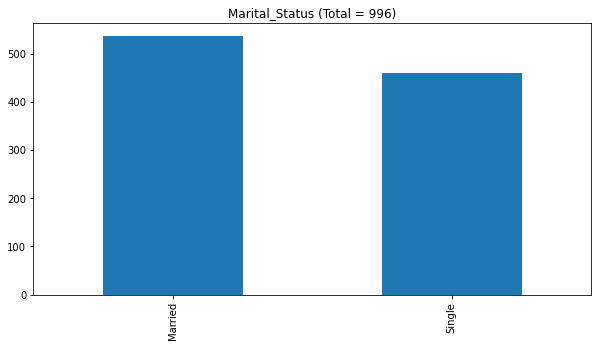

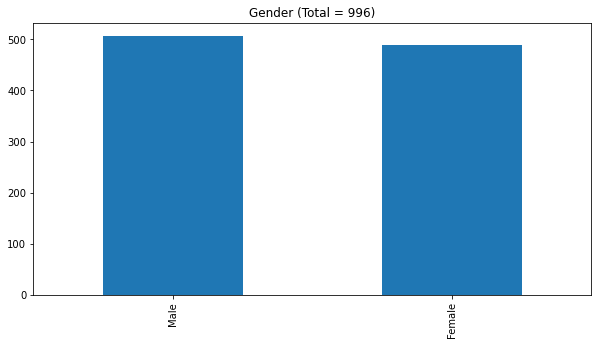

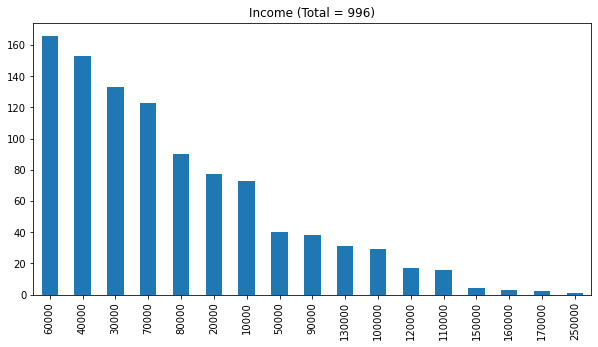

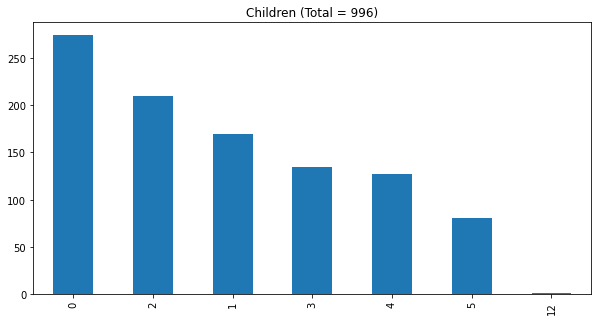

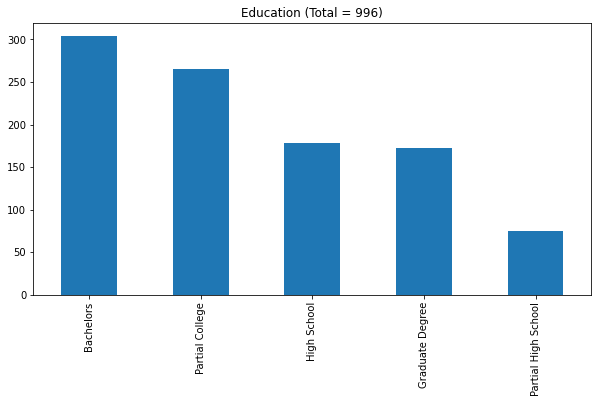

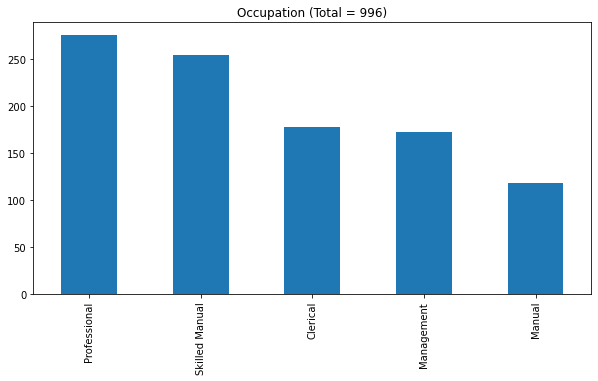

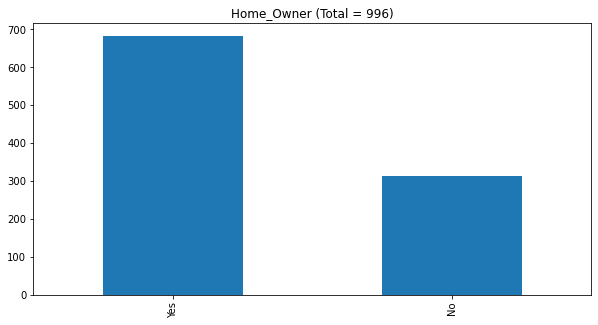

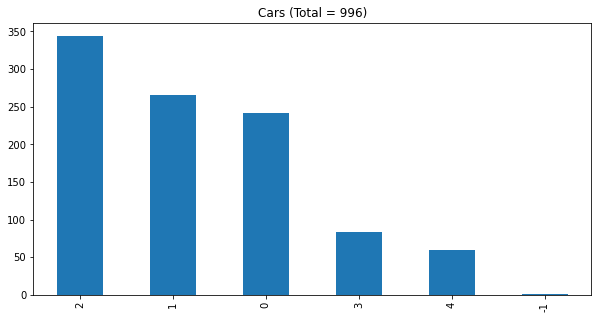

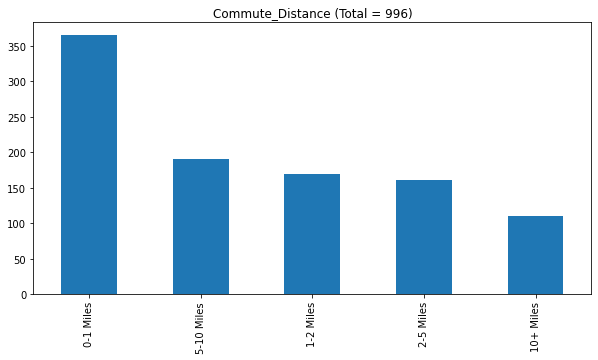

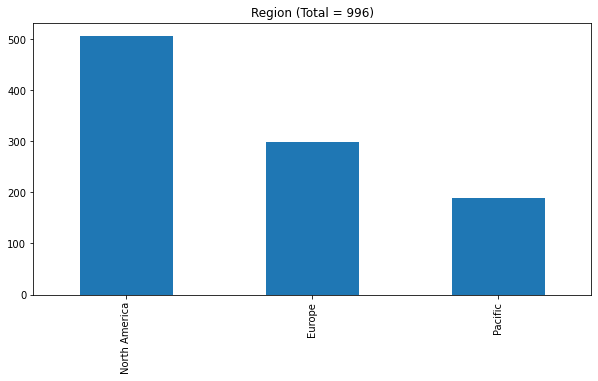

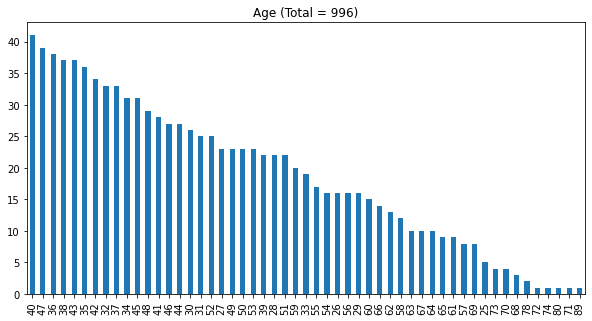

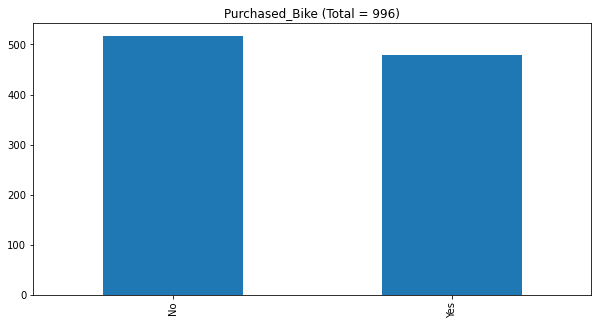

In [88]:
# Checking the data for inconsistencies

data.columns = data.columns.str.replace(' ', '_') # Removing column label spaces


# 'Unnamed: 13' Mostly a Nan column. One non nan value due to sample being distorted
data['Unnamed:_13'].isna().sum() # Determining whether the entire column is Nan values or not
#print(data.iloc[8,:]) #Print distorted sample

data_clean = data.drop(columns=['ID','Unnamed:_13']) # Dropping the non-informative attributes
data_clean = data_clean.dropna() # Dropping the faulty sample/s

print('Number of Nan values remaining:',data_clean.isna().sum().sum())  # Finding additional Nan Values in the dataset


# Finding the number of unique instances per column and further checking for Nan values or mistakes
for column in data_clean.columns:
    vars()[column+'_Classes'] = data_clean[column].value_counts()

#Plotting bar charts of the column instances
for column in data_clean.columns:
    plt.figure()
    data_clean[column].value_counts().plot(kind='bar',figsize = (10,5),title = column + ' (Total = {})'.format(vars()[column+'_Classes'].sum()))

In [89]:
#### NBNBNBNB!!! ONLY RUN ONCE

# Finding outlier sample numbers identified from bar plots (Found sample 998 and 72)

for i,value in enumerate(data_clean['Children']):
    if value == 12:
        print('12 Children sample number:',i)

for i,value in enumerate(data_clean['Cars']):
    if value == '-1':
        print('-1 Cars sample number: ', i)
        print()

data_clean['Cars'] = pd.to_numeric(data_clean['Cars'], downcast="float") # Convert number of cars column to numbers instead of strings
data_clean['Income'] = pd.to_numeric(data_clean['Income'], downcast="float")
data_clean['Age'] = pd.to_numeric(data_clean['Age'], downcast="float")

data_clean.drop(data_clean[data_clean['Children'] > 10].index, inplace = True)
data_clean.drop(data_clean[data_clean['Cars'] < 0].index, inplace = True)
# data_filtered = data_clean[data_clean['Children'] <= 10]

for i,value in enumerate(data_clean['Children']):
    if value == 12:
        print('12 Children sample number:',i)

for i,value in enumerate(data_clean['Cars']):
    if value == '-1':
        print('-1 Cars sample number: ', i)
        print()

12 Children sample number: 995
-1 Cars sample number:  72



In [90]:
''' Run to check whether dataset now has correct values and no Nan values present'''

# # Finding the number of unique instances per column and further checking for Nan values or mistakes
# for column in data_clean.columns:
#     vars()[column+'_Classes'] = data_clean[column].value_counts()

# #Plotting bar charts of the column instances
# for column in data_clean.columns:
#     plt.figure()
#     data_clean[column].value_counts().plot(kind='bar',figsize = (10,5),title = column + ' (Total = {})'.format(vars()[column+'_Classes'].sum()))

' Run to check whether dataset now has correct values and no Nan values present'

# Broad data anlysis

In [91]:
purchased_bike = data_clean[data_clean['Purchased_Bike'] =='Yes']
did_not_purchase_bike = data_clean[data_clean['Purchased_Bike'] == 'No']

In [98]:
print('Modal class of marital status for people who purchased bikes:',purchased_bike['Marital_Status'].mode())
print('Modal class of Gender for people who purchased bikes:',purchased_bike['Gender'].mode())
print('Average Income for people who purchased bikes:',np.mean(purchased_bike['Income'].values))
print('Modal class of Income for people who purchased bikes:',purchased_bike['Income'].mode())

print('Average number of children for people who purchased bikes:',np.mean(purchased_bike['Children'].values))
print('Modal class of Children for people who purchased bikes:',purchased_bike['Children'].mode())

print('Modal class of education for people who purchased bikes:',purchased_bike['Education'].mode())
print('Modal class of occupation for people who purchased bikes:',purchased_bike['Occupation'].mode())
print('Modal class of Home ownership for people who purchased bikes:',purchased_bike['Home_Owner'].mode())
print('Average number of cars for people who purchased bikes:',np.mean(purchased_bike['Cars'].values))
print('Modal class of Cars distance for people who purchased bikes:',purchased_bike['Cars'].mode())

print('Modal class of commuting distance for people who purchased bikes:',purchased_bike['Commute_Distance'].mode())
print('Modal class of region for people who purchased bikes:',purchased_bike['Region'].mode())
print('Average Age for people who purchased bikes:',np.mean(purchased_bike['Age'].values))
print('Modal class of age for people who purchased bikes:',purchased_bike['Age'].mode())


purchased_bike.head()

Modal class of marital status for people who purchased bikes: 0    Single
dtype: object
Modal class of Gender for people who purchased bikes: 0    Male
dtype: object
Average Income for people who purchased bikes: 57468.62
Modal class of Income for people who purchased bikes: 0    40000.0
dtype: float32
Average number of children for people who purchased bikes: 1.711297071129707
Modal class of Children for people who purchased bikes: 0    0
dtype: int64
Modal class of education for people who purchased bikes: 0    Bachelors
dtype: object
Modal class of occupation for people who purchased bikes: 0    Professional
dtype: object
Modal class of Home ownership for people who purchased bikes: 0    Yes
dtype: object
Average number of cars for people who purchased bikes: 1.2217573
Modal class of Cars distance for people who purchased bikes: 0    1.0
dtype: float32
Modal class of commuting distance for people who purchased bikes: 0    0-1 Miles
dtype: object
Modal class of region for people who 

,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike
0,Married,Male,10000.0,0,Partial College,Manual,No,1.0,0-1 Miles,Pacific,26.0,Yes
3,Single,Male,10000.0,0,Partial College,Manual,Yes,1.0,1-2 Miles,Pacific,26.0,Yes
4,Single,Male,10000.0,0,Graduate Degree,Manual,No,0.0,0-1 Miles,Europe,30.0,Yes
5,Single,Female,10000.0,0,Partial College,Manual,No,1.0,0-1 Miles,Pacific,26.0,Yes
6,Married,Male,10000.0,0,Partial College,Manual,Yes,1.0,2-5 Miles,Pacific,25.0,Yes


In [100]:
print('Modal class of marital status for people who did not purchase bikes:',did_not_purchase_bike['Marital_Status'].mode())
print('Modal class of Gender for people who did not purchase bikes:',did_not_purchase_bike['Gender'].mode())
print('Average Income for people who did not purchase bikes:',np.mean(did_not_purchase_bike['Income'].values))
print('Modal class of Income for people who did not purchase bikes:',did_not_purchase_bike['Income'].mode())

print('Average number of children for people who did not purchase bikes:',np.mean(did_not_purchase_bike['Children'].values))
print('Modal class of children for people who did not purchase bikes:',did_not_purchase_bike['Children'].mode())

print('Modal class of education for people who did not purchase bikes:',did_not_purchase_bike['Education'].mode())
print('Modal class of occupation for people who did not purchase bikes:',did_not_purchase_bike['Occupation'].mode())
print('Modal class of Home ownership for people who did not purchase bikes:',did_not_purchase_bike['Home_Owner'].mode())
print('Average number of cars for people who did not purchase bikes:',np.mean(did_not_purchase_bike['Cars'].values))
print('Modal class of Cars for people who did not purchase bikes:',did_not_purchase_bike['Cars'].mode())

print('Modal class of commuting distance for people who did not purchase bikes:',did_not_purchase_bike['Commute_Distance'].mode())
print('Modal class of region for people who did not purchase bikes:',did_not_purchase_bike['Region'].mode())
print('Average Age for people who did not purchase bikes:',np.mean(did_not_purchase_bike['Age'].values))
print('Modal class of Age for people who did not purchase bikes:',did_not_purchase_bike['Age'].mode())


did_not_purchase_bike.head()

Modal class of marital status for people who did not purchase bikes: 0    Married
dtype: object
Modal class of Gender for people who did not purchase bikes: 0    Male
dtype: object
Average Income for people who did not purchase bikes: 54844.96
Modal class of Income for people who did not purchase bikes: 0    60000.0
dtype: float32
Average number of children for people who did not purchase bikes: 2.10077519379845
Modal class of children for people who did not purchase bikes: 0    0
dtype: int64
Modal class of education for people who did not purchase bikes: 0    Partial College
dtype: object
Modal class of occupation for people who did not purchase bikes: 0    Skilled Manual
dtype: object
Modal class of Home ownership for people who did not purchase bikes: 0    Yes
dtype: object
Average number of cars for people who did not purchase bikes: 1.6627907
Modal class of Cars for people who did not purchase bikes: 0    2.0
dtype: float32
Modal class of commuting distance for people who did not

,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike
1,Married,Female,10000.0,0,Partial High School,Manual,No,2.0,0-1 Miles,Europe,30.0,No
2,Single,Female,10000.0,0,Partial High School,Manual,No,2.0,0-1 Miles,Europe,35.0,No
7,Married,Female,10000.0,0,Partial College,Manual,No,1.0,0-1 Miles,Pacific,25.0,No
9,Married,Female,10000.0,0,Partial College,Manual,Yes,1.0,2-5 Miles,Pacific,27.0,No
11,Single,Female,10000.0,0,Partial High School,Manual,No,2.0,0-1 Miles,Europe,32.0,No


# Setting up the neural Network model

In [483]:
#Label encoding to convert categorical data to numerical data for implementation in the neural network.

data_clean['Marital_Status'].replace({'Married':1, 'Single':0}, inplace=True)
data_clean['Gender'].replace({'Female':1, 'Male':0}, inplace=True)
data_clean['Education'].replace({'Partial High School':1, 'High School':2,'Partial College':3,'Graduate Degree':4,'Bachelors':5}, inplace=True)
data_clean['Occupation'].replace({'Manual':1, 'Skilled Manual':2,'Clerical':3,'Professional':4,'Management':5}, inplace=True)
data_clean['Home_Owner'].replace({'No':0, 'Yes':1}, inplace=True)
data_clean['Commute_Distance'].replace({'0-1 Miles':0, '1-2 Miles':1,'2-5 Miles':2,'5-10 Miles':3,'10+ Miles':4}, inplace=True)
data_clean['Region'].replace({'North America':1, 'Europe':2,'Pacific':3}, inplace=True)
data_clean['Purchased_Bike'].replace({'No':0, 'Yes':1}, inplace=True)

data_clean.head()

#Splitting the dataset into a training and test dataset
Y = data_clean.values[:,-1]
# Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2)

X1 = data_clean['Education'].values
X2 = data_clean.iloc[:,np.r_[1,4]].values
X3 = data_clean.iloc[:,np.r_[1,4,7]].values
X4 = data_clean.iloc[:,np.r_[1,4,7,8]].values
X5 = data_clean.iloc[:,np.r_[1,4,7,8,0]].values
X6 = data_clean.iloc[:,np.r_[1,4,7,8,0,9]].values
X7 = data_clean.iloc[:,np.r_[1,4,7,8,0,9,10]].values
X8 = data_clean.iloc[:,np.r_[1,4,7,8,0,9,10,5]].values
X9 = data_clean.iloc[:,np.r_[1,4,7,8,0,9,10,5,6]].values
X10 = data_clean.iloc[:,np.r_[1,4,7,8,0,9,10,5,6,3]].values
X11 = data_clean.iloc[:,np.r_[1,4,7,8,0,9,10,5,6,3,2]].values

scaler = StandardScaler()

X1_scaled = scaler.fit_transform(X1.reshape(-1,1))
X2_scaled = scaler.fit_transform(X2)
X3_scaled = scaler.fit_transform(X3)
X4_scaled = scaler.fit_transform(X4)
X5_scaled = scaler.fit_transform(X5)
X6_scaled = scaler.fit_transform(X6)
X7_scaled = scaler.fit_transform(X7)
X8_scaled = scaler.fit_transform(X8)
X9_scaled = scaler.fit_transform(X9)
X10_scaled = scaler.fit_transform(X10)
X11_scaled = scaler.fit_transform(X11)

In [497]:
# Defining the K fold cross validator
kfold = KFold(n_splits=10)

num_inputs = 11
data_used = X11_scaled
#Starting k-fold model evaluation
acc_per_fold1 = []
loss_per_fold1 = []
recall_per_fold1 = []
precision_per_fold1 = []
fold_num = 1
for train,test in kfold.split(data_used,Y):
    #Building the NN (7 Hidden layer neurons, 1 output neuron, RELU activation for input and hidden layer, Sigmoid activation function for output layer)
    model_1_input = keras.Sequential([
    keras.layers.Dense(units = num_inputs,activation='relu',input_shape = (num_inputs,)),
    keras.layers.Dense(units = 7, activation='relu'),
    keras.layers.Dense(units = 1, activation='sigmoid'),
])

    #Adam optimiser is used as it is an industry standard. Binary cross entropy loss function as it is binary classification.
    model_1_input.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

    print('------------------')
    print('Training fold {}'.format(fold_num))
    history = model_1_input.fit(data_used[train],Y[train], epochs=100, batch_size=53,verbose =0)

    loss, acc,precision,recall = model_1_input.evaluate(data_used[test],Y[test], verbose=0)

    acc_per_fold1.append(acc * 100)
    loss_per_fold1.append(loss)
    recall_per_fold1.append(recall)
    precision_per_fold1.append(precision)

    fold_num = fold_num + 1

------------------
Training fold 1
------------------
Training fold 2
------------------
Training fold 3
------------------
Training fold 4
------------------
Training fold 5
------------------
Training fold 6
------------------
Training fold 7
------------------
Training fold 8
------------------
Training fold 9
------------------
Training fold 10


In [498]:
print('Average k-fold accuracy for single input NN:',np.mean(acc_per_fold1))
print('Average k-fold loss for single input NN:',np.mean(loss_per_fold1))
print('Average k-fold precision for single input NN:',np.mean(precision_per_fold1))
print('Average k-fold recall for single input NN:',np.mean(recall_per_fold1))

Average k-fold accuracy for single input NN: 58.44444364309311
Average k-fold loss for single input NN: 0.7016057912918052
Average k-fold precision for single input NN: 0.5764562
Average k-fold recall for single input NN: 0.6133742
